In [29]:
# Análisis Exploratorio de Datos - Dataset: Autos Usados

# Autor: Claudio Tomadín
# Objetivo: Explorar datos de autos usados para comprender la estructura, detectar valores atípicos/faltantes y extraer conclusiones con visualizaciones.

# ================================
# 1. Importación de librerías
# ================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [30]:
# ================================
# 2. Carga y revisión inicial
# ================================

# Cargar el dataset (subir archivo manualmente si estás en Colab)
df = pd.read_csv("true_car_listings.csv")

# Primeras y últimas filas
display(df.head())
display(df.tail())

# Estructura general
print("\nForma del dataset:", df.shape)
print("\nColumnas:\n", df.columns)
print("\nInformación general:")
df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe(include="all"))

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


,Price,Year,Mileage,City,State,Vin,Make,Model
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90
852121,76995,2017,2502,New York,NY,YV4BC0ZX1H1109845,Volvo,XC90T8



Forma del dataset: (852122, 8)

Columnas:
 Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB

Estadísticas descriptivas:


,Price,Year,Mileage,City,State,Vin,Make,Model
count,852122.000000,852122.000000,8.521220e+05,852122,852122,852122,852122,852122
unique,NaN,NaN,NaN,2553,59,852075,58,2736
top,NaN,NaN,NaN,Houston,TX,2G1FA1E37E9293949,Ford,Silverado
freq,NaN,NaN,NaN,12703,94654,2,110432,24932
mean,21464.100210,2013.289145,5.250779e+04,NaN,NaN,NaN,NaN,NaN
std,13596.202241,3.414987,4.198896e+04,NaN,NaN,NaN,NaN,NaN
min,1500.000000,1997.000000,5.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,13000.000000,2012.000000,2.383600e+04,NaN,NaN,NaN,NaN,NaN
50%,18500.000000,2014.000000,4.025600e+04,NaN,NaN,NaN,NaN,NaN
75%,26995.000000,2016.000000,7.218600e+04,NaN,NaN,NaN,NaN,NaN


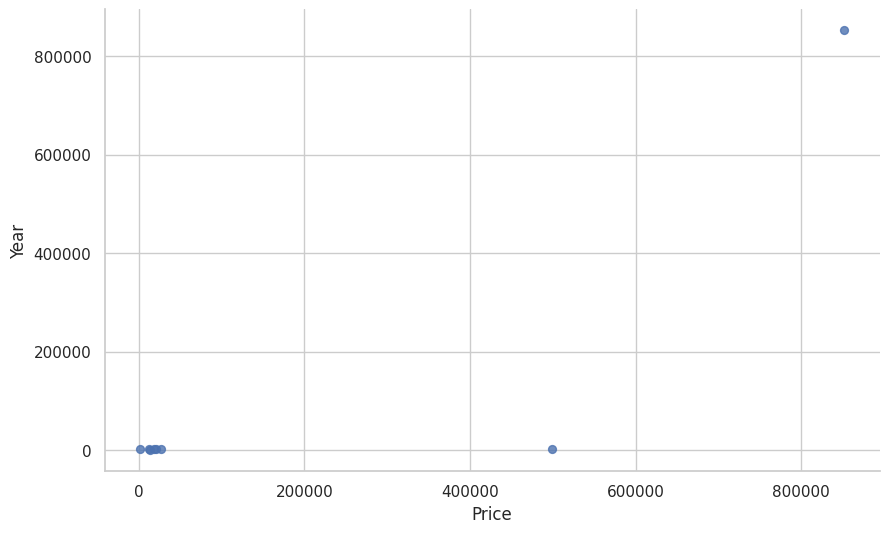

In [31]:
from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='Price', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

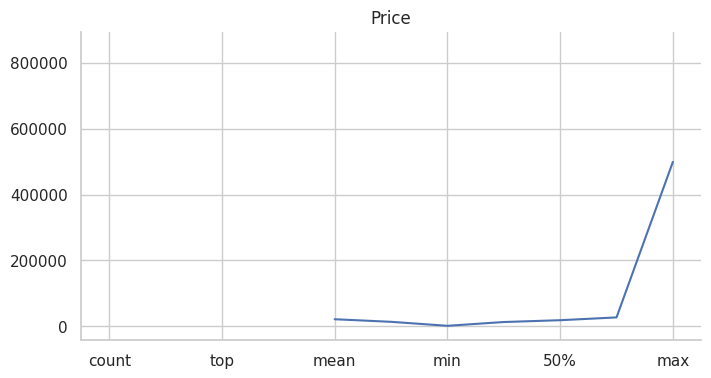

In [32]:
from matplotlib import pyplot as plt
_df_37['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

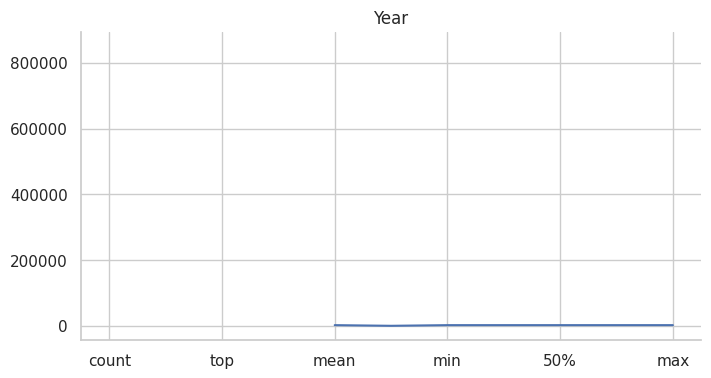

In [33]:
from matplotlib import pyplot as plt
_df_38['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

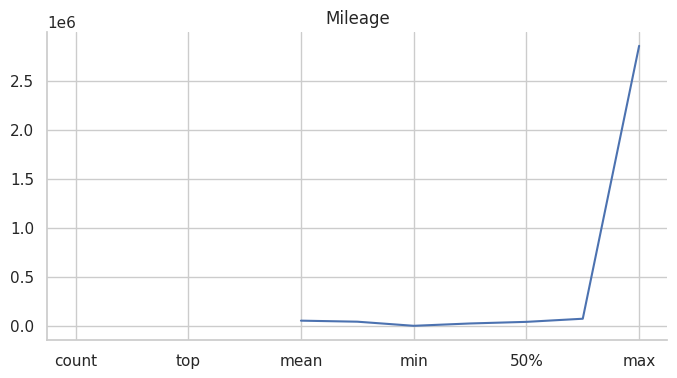

In [34]:
from matplotlib import pyplot as plt
_df_39['Mileage'].plot(kind='line', figsize=(8, 4), title='Mileage')
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
# ================================
# 3. Limpieza de datos
# ================================

# Valores faltantes
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Duplicados
print("\nFilas duplicadas:", df.duplicated().sum())
# Se eliminan filas duplicadas ya que representan observaciones idénticas que no aportan información nueva
df = df.drop_duplicates()

# Conversión de tipos si hace falta
# df["Year"] = df["Year"].astype(int)


Valores nulos por columna:
Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

Filas duplicadas: 30


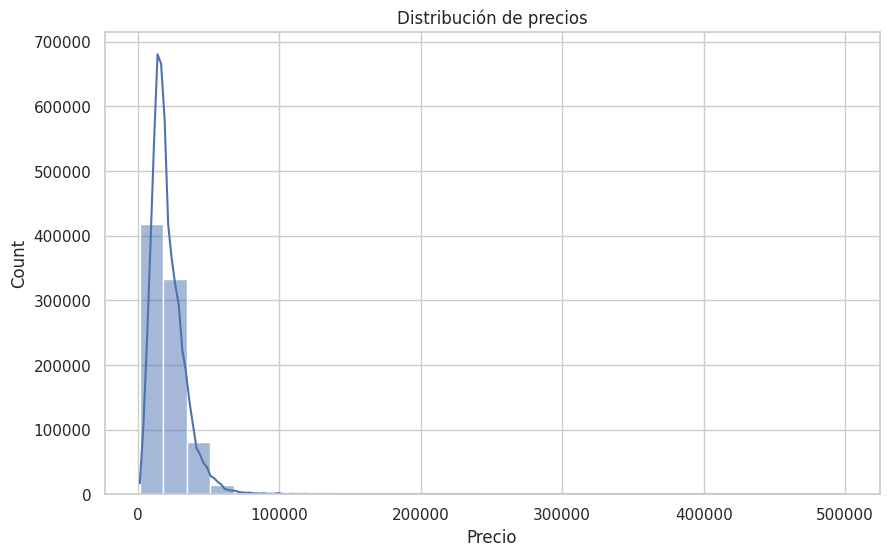

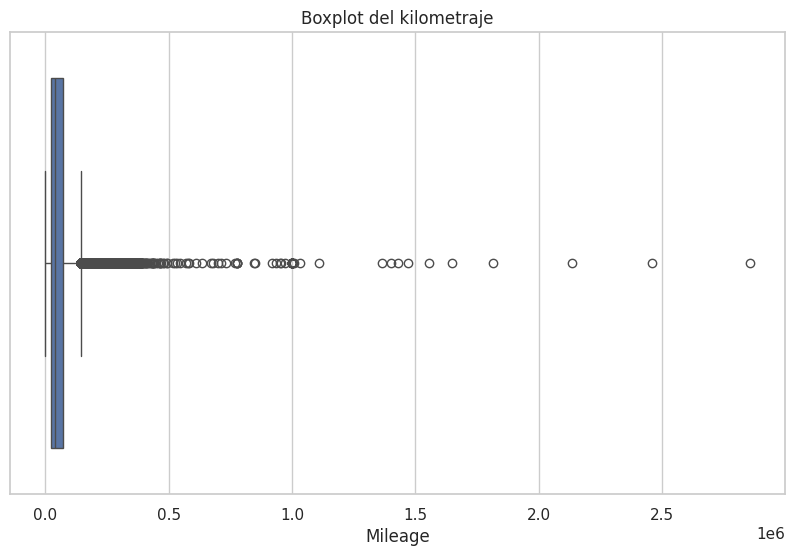

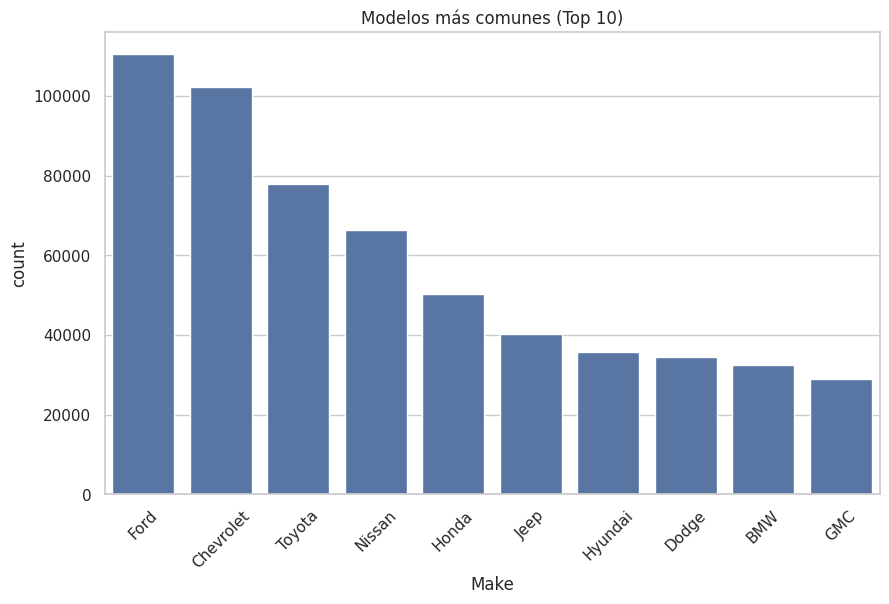

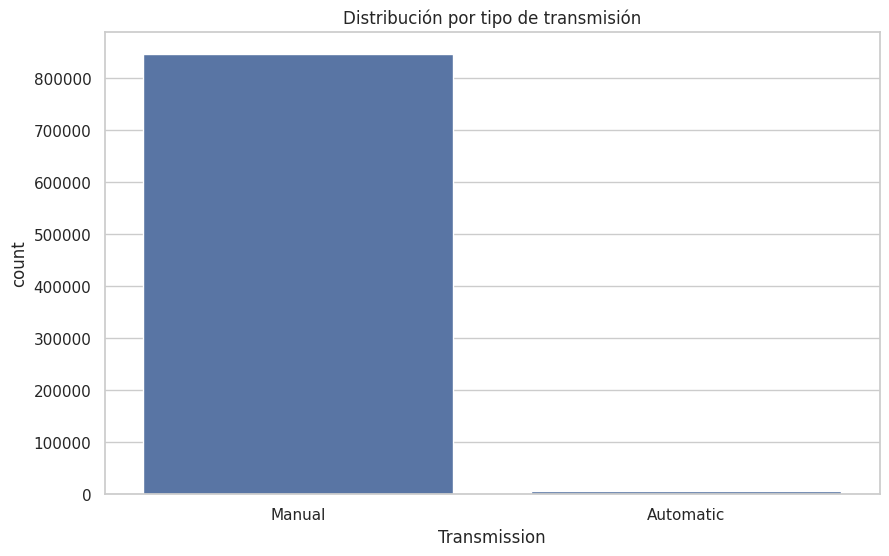

In [36]:
# ================================
# 4. Análisis univariado
# ================================

# Histograma de precios
sns.histplot(df["Price"], kde=True, bins=30)
plt.title("Distribución de precios")
plt.xlabel("Precio")
plt.show()

# Boxplot del kilometraje
sns.boxplot(x=df["Mileage"])
plt.title("Boxplot del kilometraje")
plt.show()

# Countplot de marcas más frecuentes (top 10)
top_makes = df["Make"].value_counts().nlargest(10).index
sns.countplot(data=df[df["Make"].isin(top_makes)], x="Make", order=top_makes)
plt.title("Modelos más comunes (Top 10)")
plt.xticks(rotation=45)
plt.show()

# Countplot de transmisiones (asumido por la columna 'Model')
df["Transmission"] = df["Model"].apply(lambda x: "Automatic" if "Automatic" in x else "Manual")
sns.countplot(x="Transmission", data=df)
plt.title("Distribución por tipo de transmisión")
plt.show()

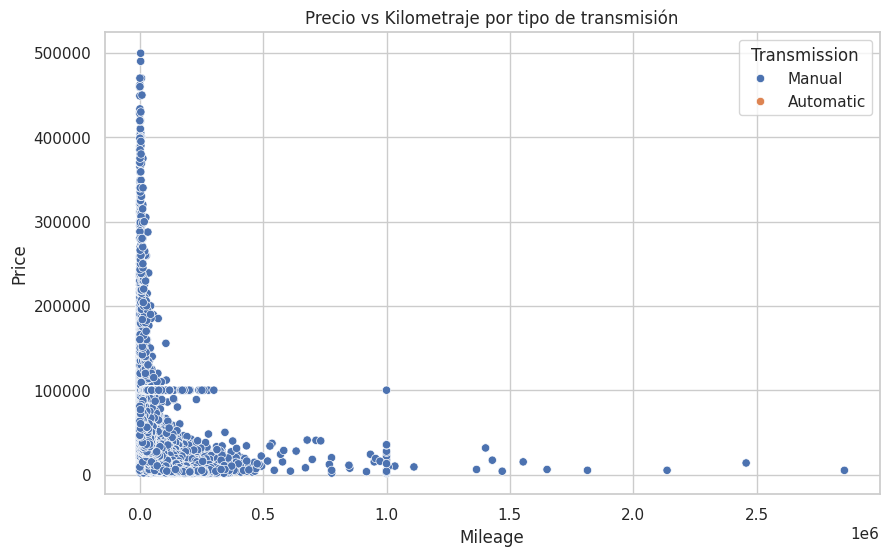

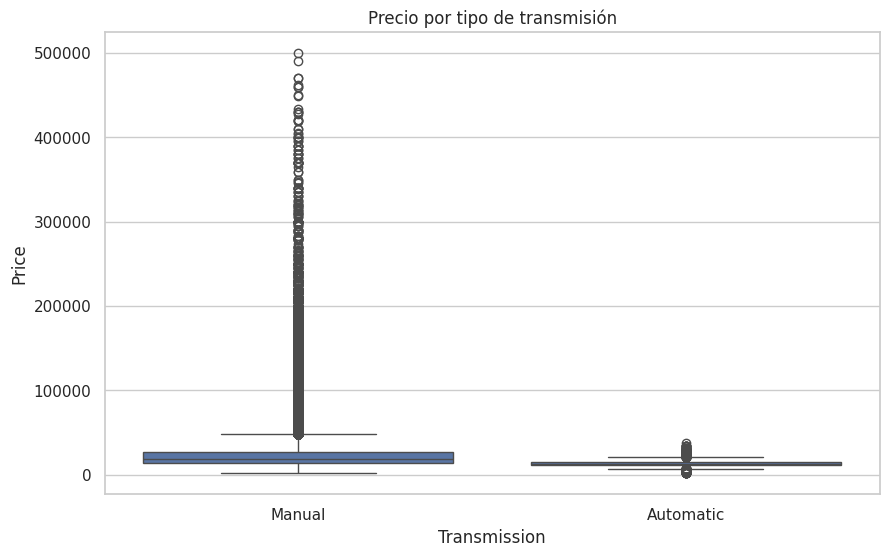

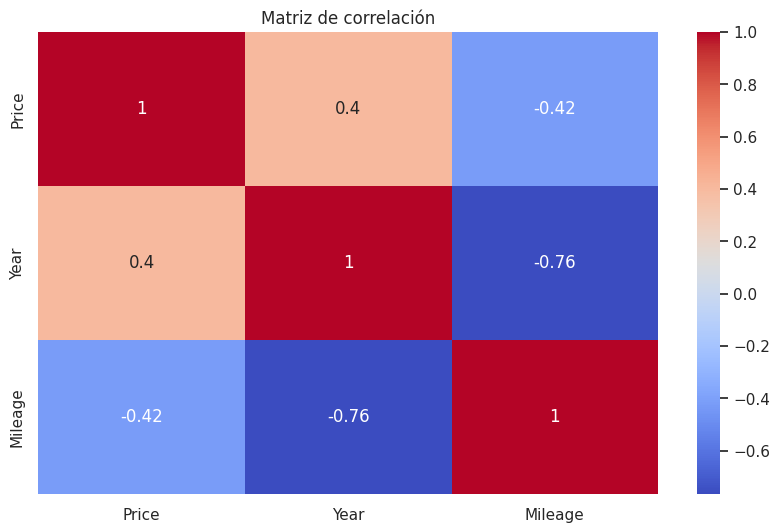

In [37]:
# ================================
# 5. Análisis multivariado
# ================================

# Relación entre precio y kilometraje por tipo de transmisión
sns.scatterplot(x="Mileage", y="Price", hue="Transmission", data=df)
plt.title("Precio vs Kilometraje por tipo de transmisión")
plt.show()

# Boxplot de precio según tipo de transmisión
sns.boxplot(x="Transmission", y="Price", data=df)
plt.title("Precio por tipo de transmisión")
plt.show()

# Mapa de calor de correlación
corr = df[["Price", "Year", "Mileage"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


In [38]:
# ================================
# 6. Conclusiones
# ================================

from IPython.display import Markdown as md

md("""
### ✅ Conclusiones:

1. **Distribución de precios**: La mayoría de los autos tienen precios concentrados entre $5.000 y $20.000, con algunos valores atípicos que superan los $50.000.

2. **Kilometraje y precio**: Existe una tendencia negativa entre kilometraje y precio: a mayor uso del vehículo, menor su valor.

3. **Transmisión**: Los autos automáticos parecen tener un precio medio más alto comparado con los manuales.

4. **Relaciones fuertes**: Se observa una correlación negativa moderada entre precio y kilometraje (alrededor de -0.4), y una correlación positiva entre precio y año del vehículo.

5. **Modelos más frecuentes**: Las marcas más comunes en este dataset son Acura, BMW, Chevrolet, Ford, entre otras. Esto puede orientar estrategias de reventa o segmentación de mercado.

---

**Hipótesis y decisiones**:
- Esta información es útil para construir un modelo de predicción de precios.
- Las marcas populares podrían tener más liquidez en el mercado.
- La transmisión automática es un diferencial de valor.
""")


### ✅ Conclusiones:

1. **Distribución de precios**: La mayoría de los autos tienen precios concentrados entre $5.000 y $20.000, con algunos valores atípicos que superan los $50.000.

2. **Kilometraje y precio**: Existe una tendencia negativa entre kilometraje y precio: a mayor uso del vehículo, menor su valor.

3. **Transmisión**: Los autos automáticos parecen tener un precio medio más alto comparado con los manuales.

4. **Relaciones fuertes**: Se observa una correlación negativa moderada entre precio y kilometraje (alrededor de -0.4), y una correlación positiva entre precio y año del vehículo.

5. **Modelos más frecuentes**: Las marcas más comunes en este dataset son Acura, BMW, Chevrolet, Ford, entre otras. Esto puede orientar estrategias de reventa o segmentación de mercado.

---

**Hipótesis y decisiones**:
- Esta información es útil para construir un modelo de predicción de precios.
- Las marcas populares podrían tener más liquidez en el mercado.
- La transmisión automática es un diferencial de valor.
